In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
#Loading Datasets
player_data = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/Seasons_Stats.csv')
player_height = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/Players.csv')

In [ ]:
player_data

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [ ]:
#Getting rid of all rows with Player = Null
player_data = player_data[player_data.Player.notnull()]

In [ ]:
#First order by Player and Win Shares
#Keep Best Season of for each player
#Drop Players that had less than x win shares
player_data = player_data.sort_values(by=['Year', 'Player'], ascending=[True, True])
player_data = player_data.drop_duplicates(subset=['Player', 'Year'])
player_data = player_data[player_data['WS'] <= 6]
player_data = player_data[player_data['WS'] > 1]

In [ ]:
#Keeping Variables we are Interested In
player_data = player_data[['Year', 'Player', 'Pos', 'Age', 'TRB%', 'AST%', 'STL%', 'BLK%', 'FG%', '3P', '3PA', 'FT%']]

In [ ]:
#Moving Position to the end so we can see our outcome variable more clearly.
player_data['Position'] = player_data['Pos']
player_data = player_data.drop(['Pos'], axis=1)

In [ ]:
#Second dataframe has height and weight data
player_height = player_height[['Player', 'height', 'weight']]
player_height

,Player,height,weight
0,Curly Armstrong,180.0,77.0
1,Cliff Barker,188.0,83.0
2,Leo Barnhorst,193.0,86.0
3,Ed Bartels,196.0,88.0
4,Ralph Beard,178.0,79.0
...,...,...,...
3917,Troy Williams,198.0,97.0
3918,Kyle Wiltjer,208.0,108.0
3919,Stephen Zimmerman,213.0,108.0
3920,Paul Zipser,203.0,97.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Joining the dataframes to match based on player height and weight.
player_data = pd.merge(player_height, player_data,  on='Player')
player_data

,Player,height,weight,Year,Age,TRB%,AST%,STL%,BLK%,FG%,3P,3PA,FT%,Position
0,Curly Armstrong,180.0,77.0,1950.0,31.0,NaN,NaN,NaN,NaN,0.279,NaN,NaN,0.705,G-F
1,Cliff Barker,188.0,83.0,1950.0,29.0,NaN,NaN,NaN,NaN,0.372,NaN,NaN,0.708,SG
2,Leo Barnhorst,193.0,86.0,1950.0,25.0,NaN,NaN,NaN,NaN,0.349,NaN,NaN,0.698,SF
3,Leo Barnhorst,193.0,86.0,1951.0,26.0,NaN,NaN,NaN,NaN,0.346,NaN,NaN,0.689,SF
4,Leo Barnhorst,193.0,86.0,1952.0,27.0,NaN,NaN,NaN,NaN,0.389,NaN,NaN,0.652,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9384,Jamal Murray,193.0,93.0,2017.0,19.0,6.7,14.0,1.4,1.1,0.404,115.0,344.0,0.883,SG
9385,Jakob Poeltl,213.0,112.0,2017.0,21.0,14.9,2.7,1.4,2.8,0.583,0.0,0.0,0.544,C
9386,Pascal Siakam,206.0,104.0,2017.0,22.0,12.2,2.9,1.5,4.5,0.502,1.0,7.0,0.688,PF
9387,Taurean Waller-Prince,183.0,88.0,2017.0,22.0,8.8,8.4,2.2,2.4,0.400,33.0,102.0,0.787,SF


In [ ]:
#Convert Position into numerical position
player_data.Position.value_counts()
position_map = {'PG': 1, 'SG': 2, 'SF': 3, 'PF' : 4, 'C' : 5, 'G-F': 3,
                'G': 2, 'F-C': 5, 'F-G': 3, 'F': 3, 'C-F': 5, 'SG-SF': 3, 'C-PF': 5,
                'PG-SG': 2, 'SF-SG': 3, 'PF-C': 5, 'SG-PG': 2, 'SG-PF': 4}
player_data['Pos_map'] = player_data['Position']
player_data['Pos_map'] = player_data['Pos_map'].map(position_map)

EDA

Lets take a look at the changes of position based stats over time.

Text(0, 0.5, 'Height(cm)')

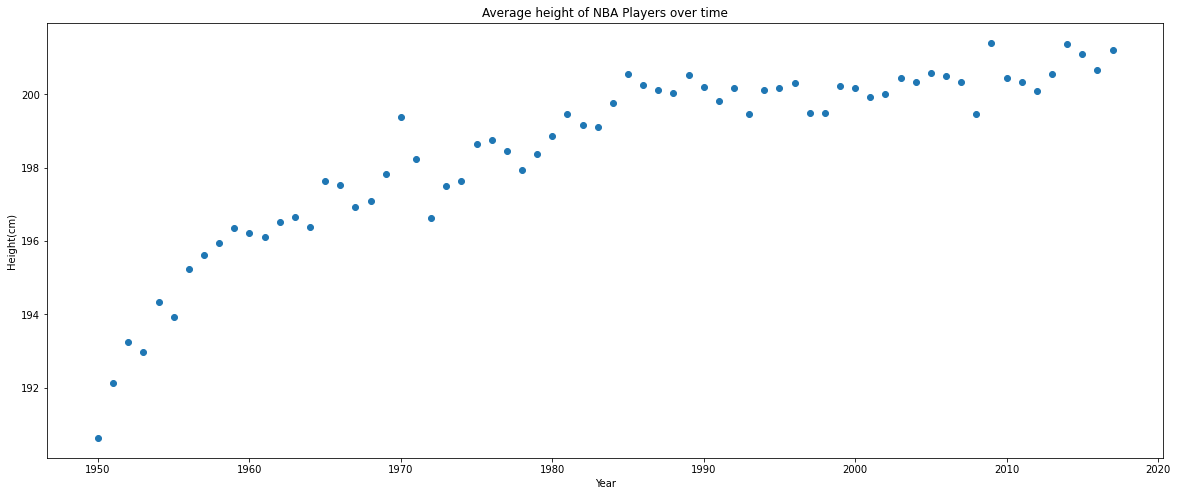

In [ ]:
#Average height over time
avg_height = player_data.groupby('Year', as_index=False)['height'].mean()
plt.figure(figsize=(20,8))
plt.scatter(avg_height['Year'], avg_height['height'])
plt.title('Average height of NBA Players over time')
plt.xlabel('Year')
plt.ylabel('Height(cm)')

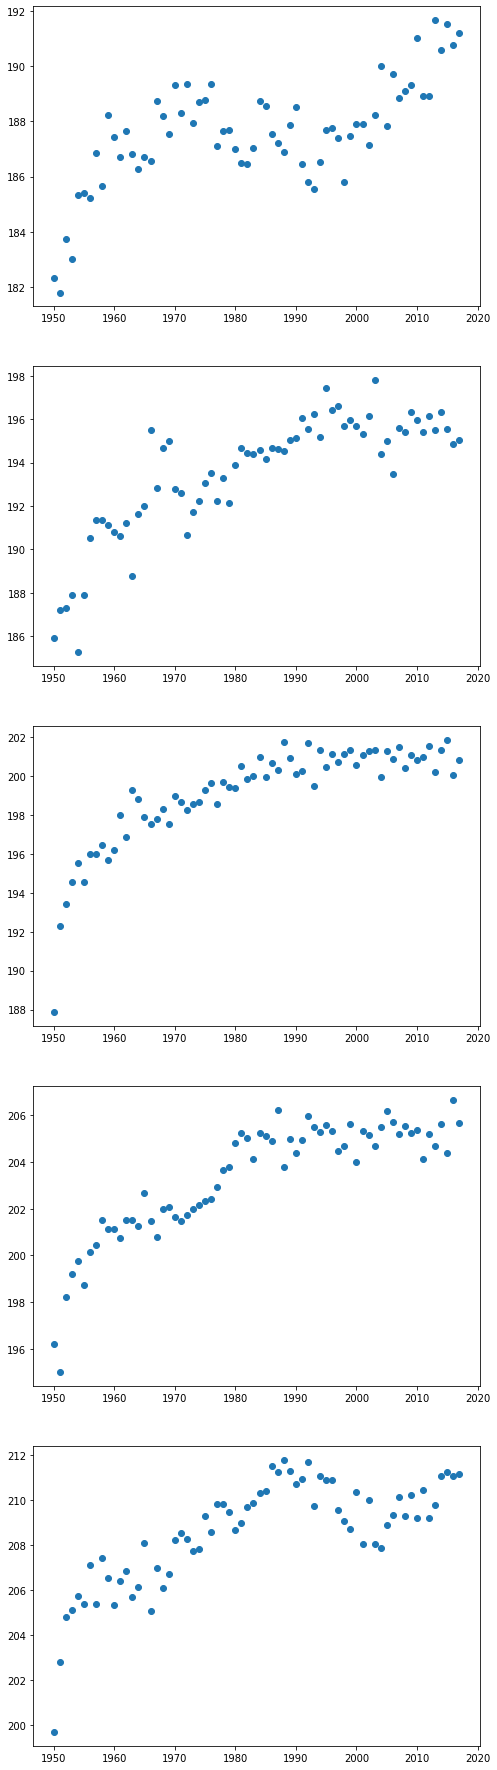

In [ ]:
#Plotting average height by position over time
avg_height = player_data.groupby(['Year', 'Pos_map'], as_index=False)['height'].mean()

one = avg_height[avg_height['Pos_map'] == 1]
two = avg_height[avg_height['Pos_map'] == 2]
three = avg_height[avg_height['Pos_map'] == 3]
four = avg_height[avg_height['Pos_map'] == 4]
five = avg_height[avg_height['Pos_map'] == 5]

fig, axs = plt.subplots(5, 1, figsize=(8,32))
axs[0].scatter(one['Year'], one['height'])
axs[1].scatter(two['Year'], two['height'])
axs[2].scatter(three['Year'], three['height'])
axs[3].scatter(four['Year'], four['height'])
axs[4].scatter(five['Year'], five['height'])

Text(0, 0.5, 'Weight(kg)')

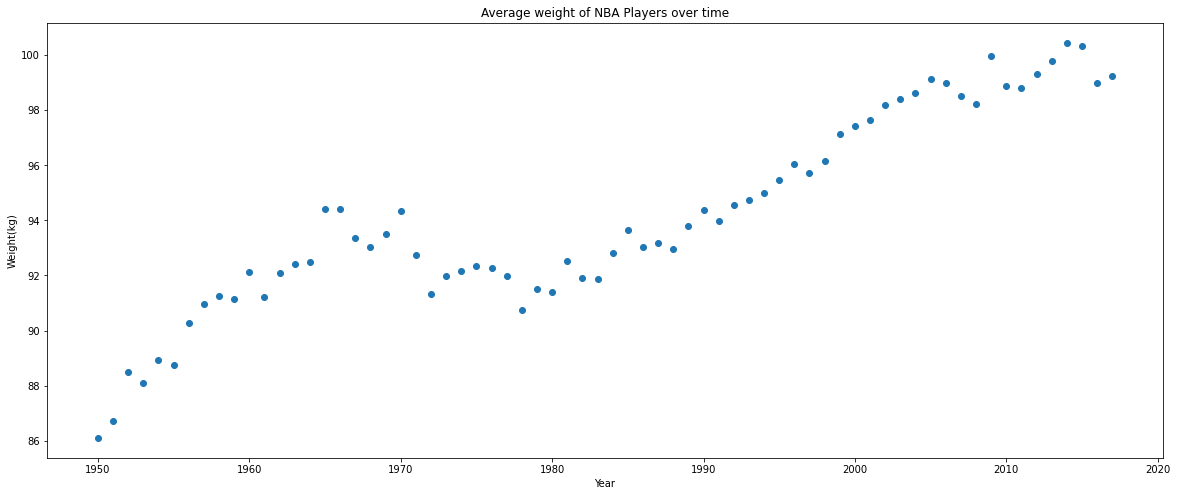

In [ ]:
#Plotting Average weight over time
avg_weight = player_data.groupby('Year', as_index=False)['weight'].mean()
plt.figure(figsize=(20,8))
plt.scatter(avg_weight['Year'], avg_weight['weight'])
plt.title('Average weight of NBA Players over time')
plt.xlabel('Year')
plt.ylabel('Weight(kg)')

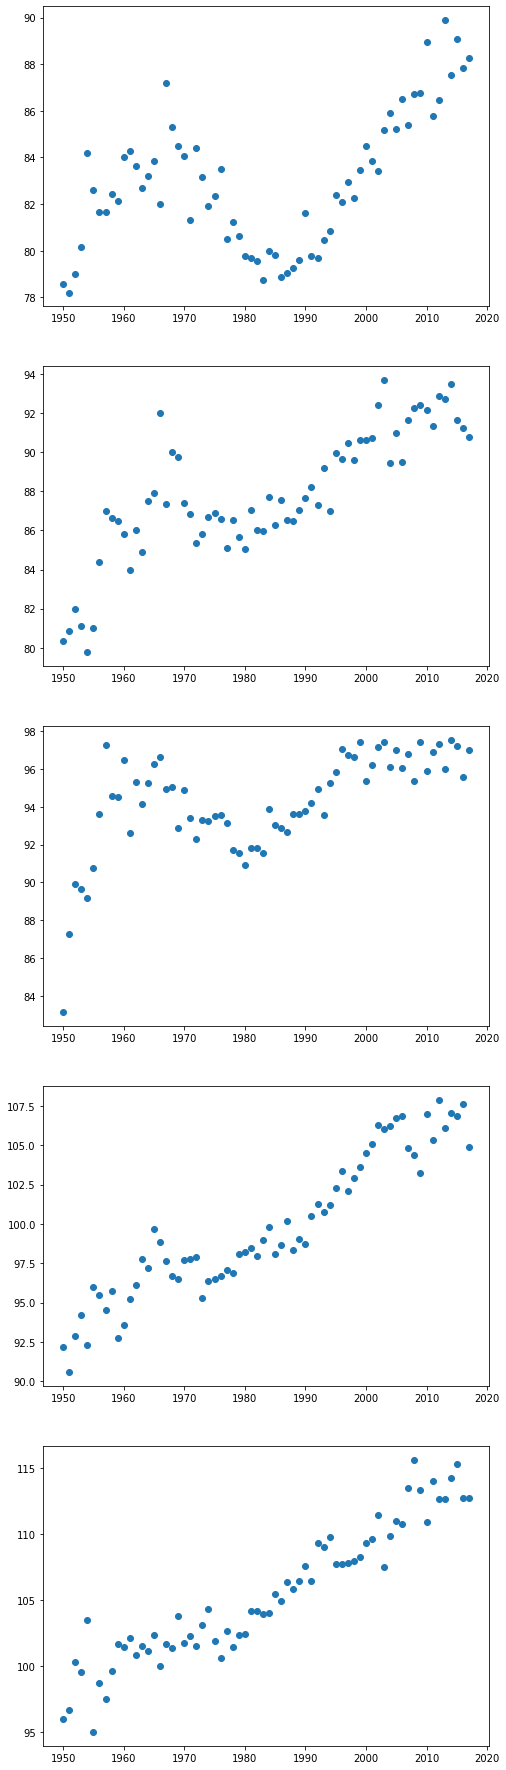

In [ ]:
#Plotting heights and weights for each position over time.
avg_weight = player_data.groupby(['Year', 'Pos_map'], as_index=False)['weight'].mean()

one = avg_weight[avg_weight['Pos_map'] == 1]
two = avg_weight[avg_weight['Pos_map'] == 2]
three = avg_weight[avg_weight['Pos_map'] == 3]
four = avg_weight[avg_weight['Pos_map'] == 4]
five = avg_weight[avg_weight['Pos_map'] == 5]

fig, axs = plt.subplots(5, 1, figsize=(8,32))
axs[0].scatter(one['Year'], one['weight'])
axs[1].scatter(two['Year'], two['weight'])
axs[2].scatter(three['Year'], three['weight'])
axs[3].scatter(four['Year'], four['weight'])
axs[4].scatter(five['Year'], five['weight'])

It is common knowledge that height and weight are two important variables in determining what position a player plays. Since there is high variability of heights and weights before 2010 in all positions, we can solely focus our data on the past 10 years to ensure more accuracy of our eventual model output. We can also rid of weight since it has been fluctuating randomly.

In [ ]:
#2010 and onwards
player_data_2010 = player_data[player_data['Year'] >= 2010]
player_data_2010 = player_data_2010.drop(['weight'], axis = 1)

In [ ]:
#Take a look at how 3 pt % has evolved over time.
#Replace NaN's as 0 in 3 pt% column.
# player_data_2010['3P%'] = player_data_2010['3P%'].fillna(0)
player_data_2010

,Player,height,Year,Age,TRB%,AST%,STL%,BLK%,FG%,3P,3PA,FT%,Position,Pos_map
1383,Greg Smith,196.0,2013.0,22.0,16.4,3.5,0.8,2.7,0.620,0.0,1.0,0.623,C,5.0
2259,Mike Dunleavy,190.0,2010.0,29.0,8.7,11.3,1.3,0.7,0.410,75.0,236.0,0.842,SF,3.0
2260,Mike Dunleavy,190.0,2011.0,30.0,9.1,10.1,1.2,1.3,0.462,102.0,254.0,0.800,SG,2.0
2261,Mike Dunleavy,190.0,2012.0,31.0,7.8,13.0,1.0,0.4,0.474,83.0,208.0,0.811,SF,3.0
2262,Mike Dunleavy,190.0,2013.0,32.0,8.0,11.5,1.0,1.3,0.442,128.0,299.0,0.820,SF,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9384,Jamal Murray,193.0,2017.0,19.0,6.7,14.0,1.4,1.1,0.404,115.0,344.0,0.883,SG,2.0
9385,Jakob Poeltl,213.0,2017.0,21.0,14.9,2.7,1.4,2.8,0.583,0.0,0.0,0.544,C,5.0
9386,Pascal Siakam,206.0,2017.0,22.0,12.2,2.9,1.5,4.5,0.502,1.0,7.0,0.688,PF,4.0
9387,Taurean Waller-Prince,183.0,2017.0,22.0,8.8,8.4,2.2,2.4,0.400,33.0,102.0,0.787,SF,3.0


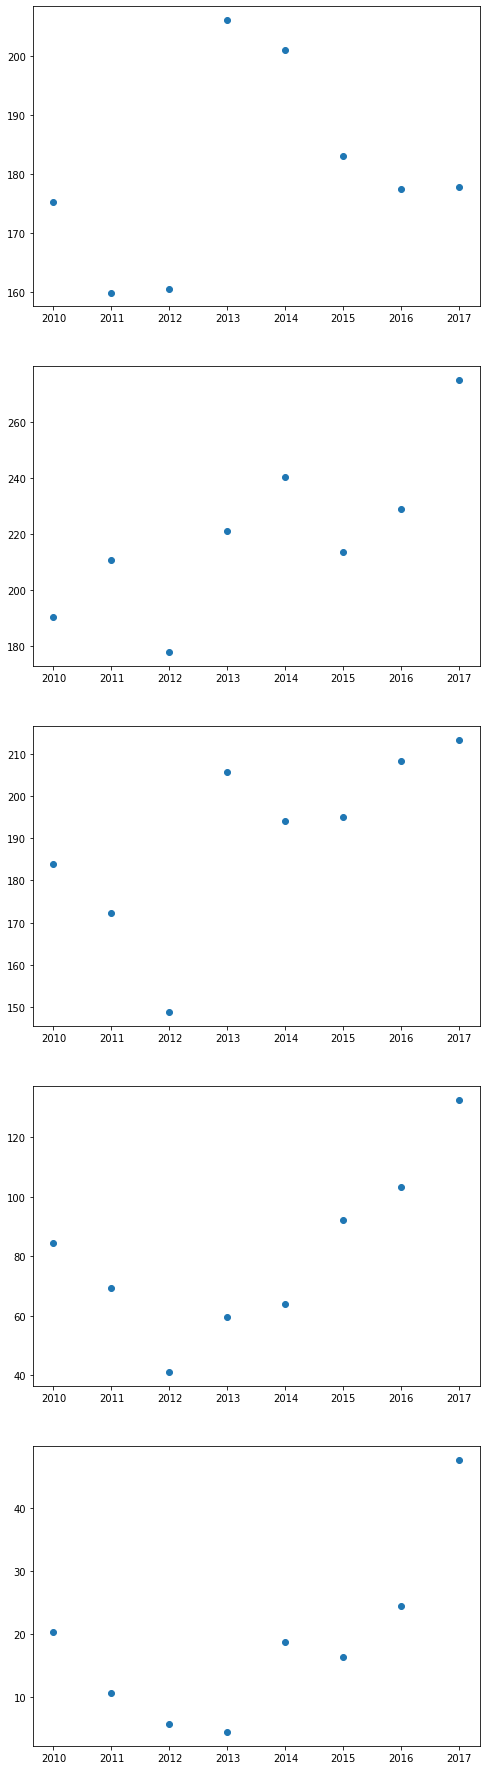

In [ ]:
avg_3 = player_data_2010.groupby(['Year', 'Pos_map'], as_index=False)['3PA'].mean()

one = avg_3[avg_3['Pos_map'] == 1]
two = avg_3[avg_3['Pos_map'] == 2]
three = avg_3[avg_3['Pos_map'] == 3]
four = avg_3[avg_3['Pos_map'] == 4]
five = avg_3[avg_3['Pos_map'] == 5]

fig, axs = plt.subplots(5, 1, figsize=(8,32))
axs[0].scatter(one['Year'], one['3PA'])
axs[1].scatter(two['Year'], two['3PA'])
axs[2].scatter(three['Year'], three['3PA'])
axs[3].scatter(four['Year'], four['3PA'])
axs[4].scatter(five['Year'], five['3PA'])

Since 3 Pointers made and attempt rate have been skyrocketting after the 2016 season, we need more data since the game is being played completely differently as compared to the 2015 season and  before. We will gather more data from 2018 and beyond.

In [ ]:
#Read in stats for 2018-2020 seasons
nba2018 = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nbadata2018.csv')
nba2019 = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nbadata2019.csv')
nba2020 = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nbadata2020.csv')

In [ ]:
#Preprocessing, getting rid of duplicate players
nba2018['TRB%'] = nba2018['DRB%'] + nba2018['ORB%']
nba2019['TRB%'] = nba2019['DRB%'] + nba2019['ORB%']
nba2020['TRB%'] = nba2020['DRB%'] + nba2020['ORB%']
nba2018['WS'] = nba2018['OWS'] + nba2018['DWS']
nba2019['WS'] = nba2019['OWS'] + nba2019['DWS']
nba2020['WS'] = nba2020['OWS'] + nba2020['DWS']
nba2018 = nba2018.sort_values(by=['Year', 'Player'], ascending=[True, True])
nba2018 = nba2018.drop_duplicates(subset=['Player', 'Year'])
nba2019 = nba2019.sort_values(by=['Year', 'Player'], ascending=[True, True])
nba2019 = nba2019.drop_duplicates(subset=['Player', 'Year'])
nba2020 = nba2020.sort_values(by=['Year', 'Player'], ascending=[True, True])
nba2020 = nba2020.drop_duplicates(subset=['Player', 'Year'])
nba2018 = nba2018[nba2018['WS'] <= 6]
nba2018 = nba2018[nba2018['WS'] > 1]
nba2019 = nba2019[nba2019['WS'] <= 6]
nba2019 = nba2019[nba2019['WS'] > 1]
nba2020 = nba2020[nba2020['WS'] <= 6]
nba2020 = nba2020[nba2020['WS'] > 1]

In [ ]:
#Read in Height/Weight for players
nbahw = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/all_seasons.csv')

In [ ]:
#Position stats for 2018-2020
nbapos2018 = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nba2018.csv')
nbapos2019 = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nba2019.csv')
nbapos2020 = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nba2020.csv')

In [ ]:
#Strip '\' from player name

def extract_name(player):
    playername = player[ :player.find("\\")]
    return playername

nba2018['Player'] = nba2018['Player'].apply(extract_name)
nba2019['Player'] = nba2019['Player'].apply(extract_name)
nba2020['Player'] = nba2020['Player'].apply(extract_name)

In [ ]:
#Preprocessing Seperate Datasets to be added to the main one
nbahw2018 = nbahw[nbahw['season'] == '2017-18']
nbahw2019 = nbahw[nbahw['season'] == '2018-19']
nbahw2020 = nbahw[nbahw['season'] == '2019-20']
nbahw2018.rename(columns={'player_name': 'Player', 'player_height': 'height', 'player_weight' : 'weight'}, inplace=True)
nbahw2019.rename(columns={'player_name': 'Player', 'player_height': 'height', 'player_weight' : 'weight'}, inplace=True)
nbahw2020.rename(columns={'player_name': 'Player', 'player_height': 'height', 'player_weight' : 'weight'}, inplace=True)
nbahw2018 = nbahw2018[['Player', 'height']]
nbahw2019 = nbahw2019[['Player', 'height']]
nbahw2020 = nbahw2020[['Player', 'height']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Getting Position Dataset and adding it to the main one
nbapos2018 = nbapos2018[['Player', 'Pos']]
nbapos2019 = nbapos2019[['Player', 'Pos']]
nbapos2020 = nbapos2020[['Player', 'Pos']]
nbapos2018.rename(columns={'Pos': 'Position'}, inplace=True)
nbapos2019.rename(columns={'Pos': 'Position'}, inplace=True)
nbapos2020.rename(columns={'Pos': 'Position'}, inplace=True)
nba2018 = pd.merge(nba2018, nbapos2018, on='Player')
nba2018all = pd.merge(nba2018, nbahw2018, on= 'Player')
nba2019 = pd.merge(nba2019, nbapos2019, on='Player')
nba2019all = pd.merge(nba2019, nbahw2019, on= 'Player')
nba2020 = pd.merge(nba2020, nbapos2020, on='Player')
nba2020all = pd.merge(nba2020, nbahw2020, on= 'Player')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Using same columns for the 3 datasets
nba2018 = nba2018all[['Player', 'height', 'Year', 'Age', 'TRB%', 'AST%', 'STL%', 'BLK%', 'FG%', '3P', '3PA','FT%', 'Position']]
nba2019 = nba2019all[['Player', 'height', 'Year', 'Age', 'TRB%', 'AST%', 'STL%', 'BLK%', 'FG%', '3P', '3PA','FT%', 'Position']]
nba2020 = nba2020all[['Player', 'height', 'Year', 'Age', 'TRB%', 'AST%', 'STL%', 'BLK%', 'FG%', '3P', '3PA','FT%', 'Position']]

In [ ]:
#Position Mapping
nba2018.Position.value_counts()
position_map = {'PG': 1, 'SG': 2, 'SF': 3, 'PF' : 4, 'C' : 5, 'PG-SG': 2, 'SF-SG': 3}
nba2018['Pos_map'] = nba2018['Position']
nba2018['Pos_map'] = nba2018['Pos_map'].map(position_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
nba2019.Position.value_counts()
position_map = {'PG': 1, 'SG': 2, 'SF': 3, 'PF' : 4, 'C' : 5, 'PF-SF': 4,
                'SF-SG': 3, 'PF-C' : 5, 'SG-PF' : 3, 'C-PF': 5, 'SG-SF' : 3}
nba2019['Pos_map'] = nba2019['Position']
nba2019['Pos_map'] = nba2019['Pos_map'].map(position_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
nba2020.Position.value_counts()
position_map = {'PG': 1, 'SG': 2, 'SF': 3, 'PF' : 4, 'C' : 5, 'PF-SF': 4, 'SF-SG': 3,
                'PF-C' : 5, 'C-PF': 5, 'SF-PF': 4,
                'SG-PG' : 2, 'PG-SG' : 2, 'SF-C' : 4}
nba2020['Pos_map'] = nba2020['Position']
nba2020['Pos_map'] = nba2020['Pos_map'].map(position_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Combining DataFrames
frames = [player_data_2010, nba2018, nba2019, nba2020]
player_data_new = pd.concat(frames)

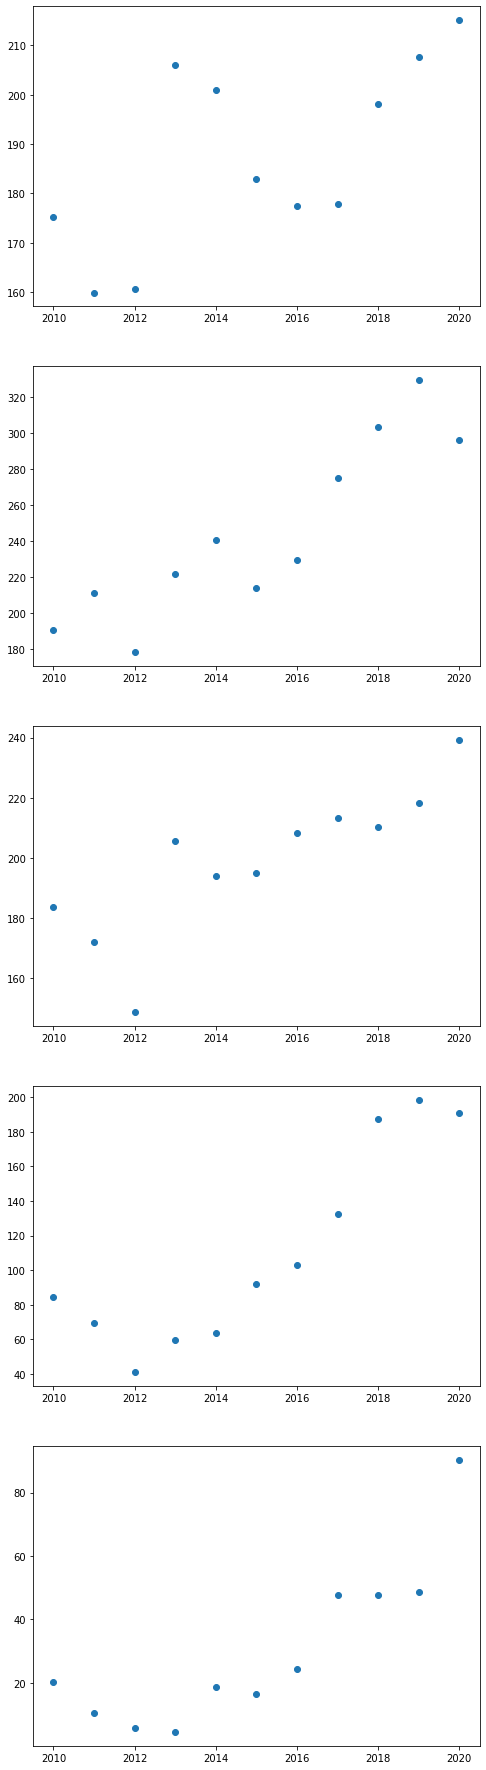

In [ ]:
#Graphing 3 point attempts over time to account for changes
avg_3 = player_data_new.groupby(['Year', 'Pos_map'], as_index=False)['3PA'].mean()

one = avg_3[avg_3['Pos_map'] == 1]
two = avg_3[avg_3['Pos_map'] == 2]
three = avg_3[avg_3['Pos_map'] == 3]
four = avg_3[avg_3['Pos_map'] == 4]
five = avg_3[avg_3['Pos_map'] == 5]

fig, axs = plt.subplots(5, 1, figsize=(8,32))
axs[0].scatter(one['Year'], one['3PA'])
axs[1].scatter(two['Year'], two['3PA'])
axs[2].scatter(three['Year'], three['3PA'])
axs[3].scatter(four['Year'], four['3PA'])
axs[4].scatter(five['Year'], five['3PA'])

Since 3 Point shots dramatically skyrocketed ~ 2015, we will only be using data from then to account for the changes in the NBA.

In [ ]:
#Fill Missing Values
player_data_new['FT%'] = player_data_new['FT%'].fillna(0)
player_data_new = player_data_new.fillna(0)

In [ ]:
#Data from 2015 and beyond and converting dataframe into numpy array.
#Scaling data for K-means
player_data_2015 = player_data_new[player_data_new['Year'] >= 2015]
player_data_2015 = player_data_2015.drop(['Year', 'Age'], axis = 1)
# X_2015df = player_data_2015[['height', 'TRB%', 'BLK%', '3P', '3PA']]
X_2015df = player_data_2015.iloc[ : , 1:10]
X_2015 = np.array(X_2015df)
scaler = StandardScaler()
scaled_2015 = scaler.fit_transform(X_2015)

In [ ]:
#Initialize Model
from sklearn.cluster import KMeans

# X = player_data_new.iloc[ : , 1:11]
# X = np.array(X)
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# y_km = km.fit_predict(X)

In [ ]:
y_km = km.fit_predict(scaled_2015)

In [ ]:
y_km = -y_km + 5
y_km = y_km + 1

In [ ]:
player_data_2018 = player_data_new[player_data_new['Year'] >= 2018]
player_data_2018 = player_data_2018.drop(['Year', 'Age'], axis = 1)
X_2018df = player_data_2018.iloc[ : , 1:10]
X_2018 = np.array(X_2018df)
scaled_2018 = scaler.fit_transform(X_2018)
y_km = km.fit_predict(scaled_2018)

In [ ]:
y_km = -y_km + 5
y_km = y_km + 1

GMM

In [ ]:
from sklearn.mixture import GaussianMixture
X = X_2015
gm = GaussianMixture(n_components=5, random_state=0).fit(X)

In [ ]:
gm_results = gm.predict(X)
gm_results

array([4, 3, 3, ..., 0, 4, 2])

In [ ]:
gm_results = -gm_results + 4
gm_results = gm_results + 1

In [ ]:
gm_results

array([1, 2, 2, ..., 5, 1, 3])

Limititations of the Data
- The data is based on what position they previously played, and it truly dependent on skill level.
- The data is biased toward each position's roles and needs. If a player originally played shooting guard and then swapped to center, the player's position role is to grab more rebounds, so their rebounding percentage would increase.
- The data only captures good players, so if a player had better stats, their weightage would be more skewed than the others.
- Data is not normal

NBA Combine Dataset

In [ ]:
import seaborn as sns

In [ ]:
combine_data = pd.read_csv('/content/drive/MyDrive/COGS 118B Final Project/nba_draft_combine.csv')

In [ ]:
combine_data

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


In [ ]:
#Drop missing columns and correlated/redundant columns
combine_data = combine_data.dropna(thresh = combine_data.shape[0]*0.35, how = 'all', axis = 1)
combine_data = combine_data.drop(['Unnamed: 0', 'Draft pick', 'Height (No Shoes)', 'Hand (Length)', 'Hand (Width)'], axis = 1)
combine_data

,Player,Year,Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Bench,Agility,Sprint
0,Blake Griffin,2009,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,22.0,10.95,3.28
1,Terrence Williams,2009,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,9.0,11.15,3.18
2,Gerald Henderson,2009,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,8.0,11.17,3.14
3,Tyler Hansbrough,2009,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,18.0,11.12,3.27
4,Earl Clark,2009,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Peter Jok,2017,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,NaN,11.34,3.41
513,Rawle Alkins,2017,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,NaN,11.99,3.30
514,Sviatoslav Mykhailiuk,2017,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,NaN,12.40,3.53
515,Thomas Welsh,2017,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,NaN,NaN,NaN


[Text(0.5, 1.0, 'NBA Draft Combine Measurements Correlation Heatmap')]

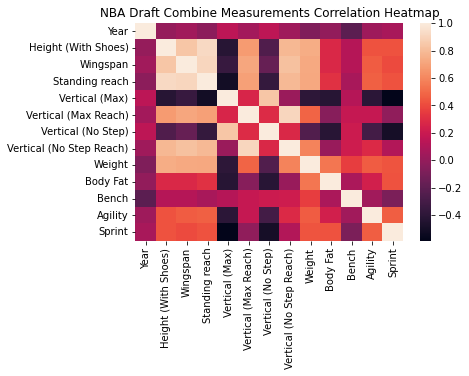

In [ ]:
#Heatmap
corr = combine_data.corr()
heatmap = sns.heatmap(corr)
heatmap.set(Title='NBA Draft Combine Measurements Correlation Heatmap')

In [ ]:
combine_data.describe()

,Year,Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Bench,Agility,Sprint
count,517.000000,516.000000,517.000000,517.000000,450.000000,450.000000,450.000000,450.000000,516.000000,514.000000,284.000000,444.000000,446.000000
mean,2013.187621,78.898740,82.497292,103.275629,35.136667,138.166667,29.584444,132.621111,214.833333,7.211673,10.239437,11.330248,3.299664
std,2.531507,3.275837,3.943068,4.897515,3.561688,4.272686,3.052361,4.644194,24.683537,2.480823,4.938390,0.563144,0.128422
min,2009.000000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,1.000000,10.070000,3.010000
25%,2011.000000,76.750000,79.750000,100.000000,32.500000,135.500000,27.500000,129.500000,196.000000,5.400000,6.750000,10.940000,3.200000
50%,2013.000000,79.000000,82.500000,103.500000,35.000000,138.500000,29.500000,133.000000,213.500000,6.600000,10.000000,11.255000,3.280000
75%,2015.000000,81.250000,85.500000,107.000000,37.500000,141.500000,31.500000,136.000000,232.000000,8.400000,14.000000,11.660000,3.380000
max,2017.000000,86.500000,92.500000,115.000000,44.500000,147.500000,38.000000,144.000000,303.000000,20.800000,23.000000,13.440000,3.810000


In [ ]:
#Final Preprocessing Steps
new_combine_data = combine_data[['Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)', 'Vertical (No Step)', 'Weight', 'Body Fat', 'Agility', 'Sprint']]
new_combine_data = new_combine_data.dropna(axis = 0)
new_combine_data

,Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (No Step),Weight,Body Fat,Agility,Sprint
0,82.00,83.25,105.0,35.5,32.0,248.0,8.2,10.95,3.28
1,78.25,81.00,103.5,37.0,30.5,213.0,5.1,11.15,3.18
2,77.00,82.25,102.5,35.0,31.5,215.0,4.4,11.17,3.14
3,81.50,83.50,106.0,34.0,27.5,234.0,8.5,11.12,3.27
4,82.25,86.50,109.5,33.0,28.5,228.0,5.2,11.17,3.35
...,...,...,...,...,...,...,...,...,...
511,78.75,83.00,101.0,39.0,34.0,201.0,6.1,10.84,3.15
512,77.75,80.00,102.0,31.0,26.5,202.0,11.0,11.34,3.41
513,75.75,80.75,99.0,40.5,31.5,223.0,11.0,11.99,3.30
514,79.50,77.00,100.0,33.0,27.0,220.0,11.4,12.40,3.53


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

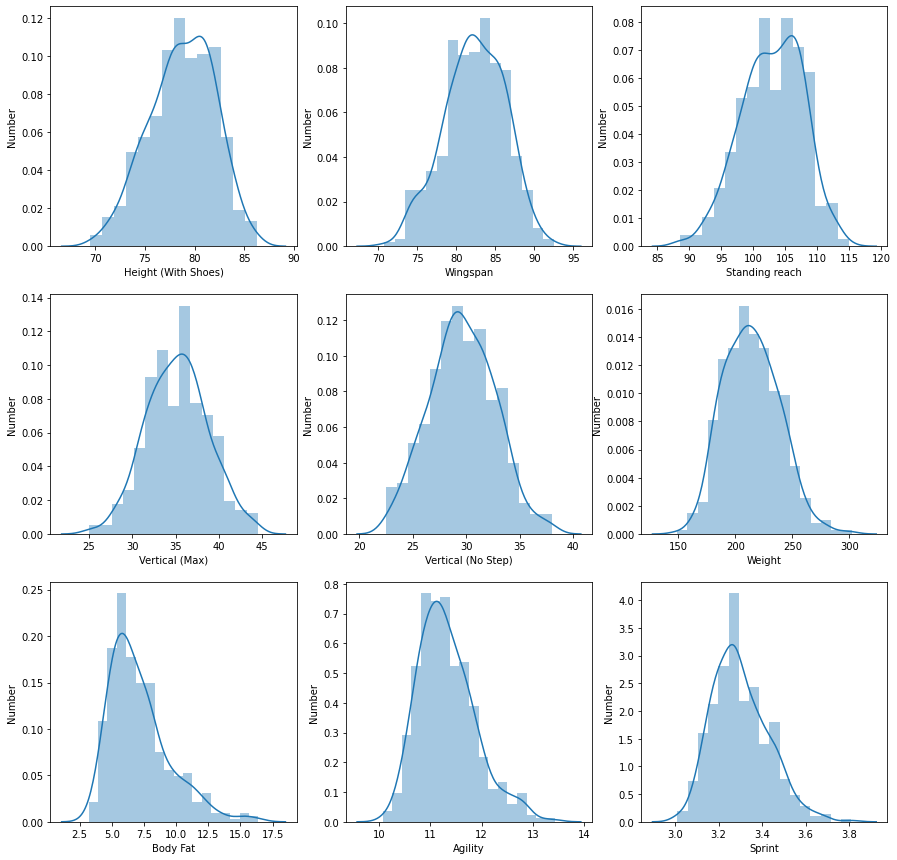

In [ ]:
#Plotting Distribtutions for all Features
fig, ax = plt.subplots(3,3, figsize=(15,15))
for index, col in enumerate(new_combine_data.columns):
    sns.distplot(new_combine_data[col], ax = ax[index//3][index%3])
    ax[index//3][index%3].set_ylabel('Number')

In [ ]:
combine_data = combine_data.dropna(thresh = combine_data.shape[1]*0.60, how = 'all', axis = 0)

In [ ]:
#Scaling Data
scaler = StandardScaler()
new_combine_data_scaler = scaler.fit_transform(new_combine_data)

In [ ]:
#KMeans Initialization
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [ ]:
pos_predict = km.fit_predict(new_combine_data_scaler)

In [ ]:
print("km: silhouttte: ", silhouette_score(new_combine_data_scaler, pos_predict))

km: silhouttte:  0.1847863068835707


In [ ]:
km.inertia_

1693.4725026103506

In [ ]:
pos_predict = pos_predict + 1

In [ ]:
#Cluster Values for Each Player in the combine
pos_predict

array([4, 2, 2, 4, 4, 3, 4, 1, 5, 5, 5, 5, 1, 3, 4, 5, 3, 1, 2, 5, 2, 4,
       2, 4, 4, 1, 3, 4, 4, 5, 5, 2, 1, 4, 5, 1, 3, 5, 5, 5, 4, 2, 1, 4,
       5, 1, 3, 1, 2, 3, 2, 4, 4, 3, 4, 5, 1, 1, 4, 4, 1, 1, 3, 4, 2, 3,
       2, 2, 1, 1, 2, 1, 4, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 1, 3, 4, 1, 1,
       5, 1, 2, 4, 3, 2, 4, 2, 4, 5, 4, 2, 1, 4, 5, 1, 4, 2, 4, 1, 5, 2,
       3, 3, 1, 3, 4, 4, 1, 2, 5, 5, 2, 4, 5, 1, 1, 5, 5, 5, 1, 1, 4, 3,
       4, 1, 4, 4, 4, 2, 2, 4, 2, 5, 2, 4, 4, 3, 4, 3, 3, 1, 2, 4, 4, 4,
       5, 2, 4, 2, 4, 1, 3, 2, 4, 4, 1, 1, 5, 1, 3, 5, 2, 1, 3, 4, 5, 1,
       5, 5, 2, 2, 4, 4, 3, 1, 1, 4, 5, 3, 1, 2, 5, 1, 5, 2, 3, 3, 4, 5,
       5, 2, 2, 4, 2, 2, 2, 4, 3, 2, 4, 2, 2, 5, 2, 5, 4, 3, 2, 3, 1, 4,
       3, 4, 1, 5, 3, 2, 2, 5, 2, 3, 2, 2, 3, 4, 4, 4, 1, 4, 5, 4, 4, 5,
       4, 5, 1, 2, 1, 5, 3, 1, 5, 2, 2, 2, 1, 2, 4, 4, 4, 2, 2, 5, 2, 4,
       2, 5, 1, 4, 2, 3, 2, 5, 1, 1, 1, 2, 4, 4, 1, 4, 5, 3, 1, 2, 5, 3,
       1, 5, 4, 3, 4, 3, 4, 4, 1, 5, 2, 5, 1, 4, 1,

T-SNE For K-Means

In [ ]:
#TSNE, plotting data in 2-D with K-means
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_output = tsne.fit_transform(new_combine_data_scaler)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 438 samples in 0.002s...
[t-SNE] Computed neighbors for 438 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 438 / 438
[t-SNE] Mean sigma: 1.029817


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.470703
[t-SNE] KL divergence after 500 iterations: 0.768077


In [ ]:
km1 = km.fit(new_combine_data_scaler)
hue_labels = km.labels_

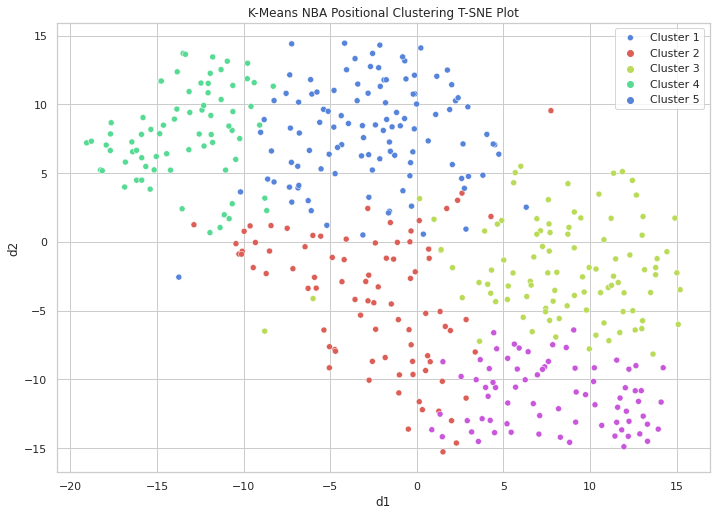

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    hue=hue_labels,
    palette=sns.color_palette("hls", 5),
    data=tsne_df,
    legend="full",
    alpha=1)
tsne_plot.set_title('K-Means NBA Positional Clustering T-SNE Plot')
tsne_plot.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

GMM

In [ ]:
from sklearn.mixture import GaussianMixture
X = new_combine_data
gm = GaussianMixture(n_components=5, random_state=0).fit(X)

In [ ]:
gm_results = gm.predict(X)

In [ ]:
print("gmm: silhouttte: ", silhouette_score(X, gm_results))

gmm: silhouttte:  0.0928775892773352


In [ ]:
gm_results = gm_results + 1

In [ ]:
#Cluster Values for all Combine Players
gm_results

array([5, 2, 3, 5, 5, 2, 5, 2, 4, 4, 4, 4, 5, 5, 5, 2, 3, 2, 2, 4, 5, 5,
       2, 5, 5, 5, 1, 5, 5, 3, 2, 3, 2, 5, 4, 3, 5, 4, 2, 4, 5, 4, 2, 5,
       2, 3, 5, 2, 2, 5, 2, 5, 5, 5, 2, 4, 5, 3, 5, 5, 3, 2, 1, 5, 3, 3,
       2, 4, 2, 2, 2, 5, 3, 5, 1, 5, 1, 5, 2, 1, 5, 5, 5, 3, 1, 5, 3, 3,
       2, 2, 2, 5, 1, 2, 5, 5, 5, 4, 5, 2, 5, 3, 4, 3, 1, 3, 5, 5, 3, 3,
       1, 1, 5, 1, 5, 5, 4, 2, 3, 3, 2, 3, 4, 3, 2, 4, 4, 2, 2, 4, 1, 5,
       5, 4, 2, 5, 5, 2, 2, 5, 2, 3, 3, 5, 5, 3, 5, 1, 5, 2, 2, 5, 5, 5,
       2, 2, 5, 2, 5, 3, 5, 3, 3, 3, 3, 4, 4, 2, 5, 2, 3, 2, 3, 1, 2, 3,
       2, 2, 3, 4, 1, 5, 5, 2, 3, 3, 2, 5, 3, 2, 2, 3, 2, 4, 5, 5, 5, 4,
       4, 2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 4, 5, 3, 5, 5, 3, 5,
       5, 2, 4, 2, 3, 4, 2, 4, 3, 5, 2, 3, 5, 5, 3, 5, 2, 2, 4, 2, 5, 4,
       2, 2, 2, 2, 5, 2, 3, 2, 4, 3, 2, 4, 2, 2, 1, 1, 2, 2, 2, 2, 4, 5,
       2, 4, 3, 5, 2, 5, 2, 4, 2, 2, 2, 3, 3, 5, 3, 5, 2, 1, 5, 2, 4, 3,
       2, 4, 5, 5, 2, 1, 5, 5, 3, 2, 2, 2, 4, 5, 2,

T-SNE For GMM

In [ ]:
#T-SNE, plotting data in 2-D with GMM
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_output = tsne.fit_transform(new_combine_data)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 438 samples in 0.001s...
[t-SNE] Computed neighbors for 438 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 438 / 438
[t-SNE] Mean sigma: 5.126696


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.674850
[t-SNE] KL divergence after 500 iterations: 0.382747


In [ ]:
gm1 = gm.fit_predict(new_combine_data)
hue_labels = gm1

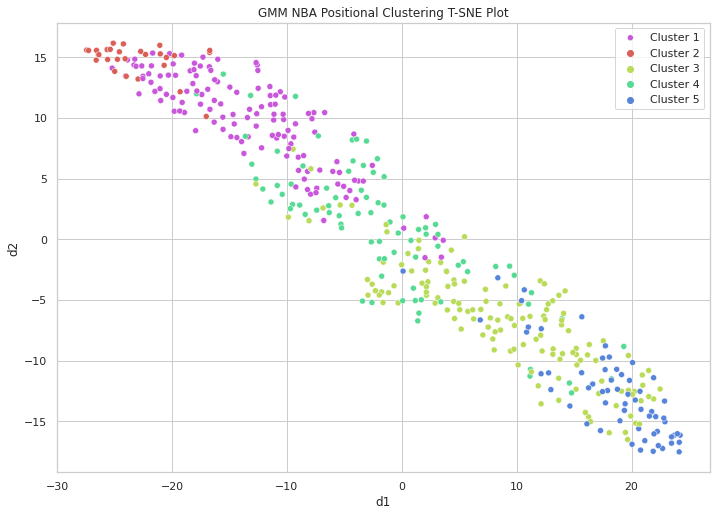

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    hue=hue_labels,
    palette=sns.color_palette("hls", 5),
    data=tsne_df,
    legend="full",
    alpha=1)
tsne_plot.set_title('GMM NBA Positional Clustering T-SNE Plot')
tsne_plot.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])